In [5]:
import pandas as pd

In [6]:
column_names = ["scale", "id", "desc_scale", "desc_id", "num_prog", "pid", "upid", "desc_pid", "phantom", "sam_mvir", "mvir",
                "rvir", "rs", "vrms", "mmp", "scale_of_last_MM", "vmax", "x", "y", "z", "vx", "vy", "vz", "Jx", "Jy", "Jz",
                "Spin", "Breadth_first_ID", "Depth_first_ID", "Tree_root_ID", "Orig_halo_ID", "Snap_num",
                "Next_coprogenitor_depthfirst_ID", "Last_progenitor_depthfirst_ID", "Last_mainleaf_depthfirst_ID",
                "Tidal_Force", "Tidal_ID", "Rs_Klypin", "Mmvir_all", "M200b", "M200c", "M500c", "M2500c", "Xoff", "Voff",
                "Spin_Bullock", "b_to_a", "c_to_a", "Ax", "Ay", "Az", "b_to_a(500c)", "c_to_a(500c)", "Ax(500c)", "Ay(500c)",
                "Az(500c)", "T/|U|", "M_pe_Behroozi", "M_pe_Diemer", "Macc", "Mpeak", "Vacc", "Vpeak", "Halfmass_Scale",
                "Acc_Rate_Inst", "Acc_Rate_100Myr", "Acc_Rate_1*Tdyn", "Acc_Rate_2*Tdyn", "Acc_Rate_Mpeak", "Mpeak_Scale",
                "Acc_Scale", "First_Acc_Scale", "First_Acc_Mvir", "First_Acc_Vmax", "Vmax@Mpeak", "Tidal_Force_Tdyn",
                "Log_(Vmax/Vmax_max(Tdyn;Tmpeak))", "Time_to_future_merger", "Future_merger_MMP_ID"]

In [7]:
data = pd.read_csv('../Data/rawdata/hlist-0.9710-sample.txt', sep='\s+', comment='#', names=column_names)

In [9]:
data.to_csv('test.csv', encoding='utf-8', index=False)

In [4]:
# Calculate Concentration
data['concentration'] = data['rvir'] / data['rs']

In [36]:
a = 1.0
b = data['b_to_a']
c = data['c_to_a']

In [37]:
# Calculate Sphericity
data['sphericity'] = c / a

In [38]:
# Calculate triaxiality
data['triaxiality'] = (a**2 - b**2) / (a**2 - c**2)

In [39]:
data[['mvir', 'rvir', 'concentration', 'sphericity', 'triaxiality', 'vmax', 'Mmvir_all']].head()

,mvir,rvir,concentration,sphericity,triaxiality,vmax,Mmvir_all
0,1.792700e+14,1157.578979,8.290747,0.49133,0.839114,945.280029,179280000000000
1,2.754900e+11,133.582993,101.046137,0.70406,0.396970,174.300003,379360000000
2,2.559200e+10,60.499001,31.942450,0.57502,0.312407,71.330002,27097000000
3,2.258100e+10,58.027000,6.434575,0.16645,0.918479,45.689999,31614000000
4,1.430400e+14,1073.677002,6.481561,0.46338,0.876235,863.599976,143350000000000


In [40]:
data = data[['mvir', 'rvir', 'concentration', 'sphericity', 'triaxiality', 'vmax', 'Mmvir_all']]

In [41]:
data.head()

,mvir,rvir,concentration,sphericity,triaxiality,vmax,Mmvir_all
0,1.792700e+14,1157.578979,8.290747,0.49133,0.839114,945.280029,179280000000000
1,2.754900e+11,133.582993,101.046137,0.70406,0.396970,174.300003,379360000000
2,2.559200e+10,60.499001,31.942450,0.57502,0.312407,71.330002,27097000000
3,2.258100e+10,58.027000,6.434575,0.16645,0.918479,45.689999,31614000000
4,1.430400e+14,1073.677002,6.481561,0.46338,0.876235,863.599976,143350000000000


In [42]:
data.tail()

,mvir,rvir,concentration,sphericity,triaxiality,vmax,Mmvir_all
932,4.531300e+12,339.721985,6.581209,0.55180,0.920007,268.519989,4543300000000
933,1.806500e+10,53.868000,44.740864,0.39894,0.894035,70.820000,33119000000
934,4.516200e+12,339.346008,2.889896,0.62837,0.643835,241.919998,4516200000000
935,4.439500e+12,337.411987,6.894964,0.69519,0.675413,269.540009,4441000000000
936,4.316000e+12,334.255005,6.838977,0.66164,0.525718,264.640015,4323500000000


In [43]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

mvir             0
rvir             0
concentration    0
sphericity       0
triaxiality      0
vmax             0
Mmvir_all        0
dtype: int64

In [44]:
# Check data types
data_types = data.dtypes
data_types

mvir             float64
rvir             float64
concentration    float64
sphericity       float64
triaxiality      float64
vmax             float64
Mmvir_all          int64
dtype: object

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features to have mean=0 and variance=1
features = StandardScaler().fit_transform(data)

# Apply PCA to the data
pca = PCA()
principal_components = pca.fit_transform(features)

# Get the explained variance of the components
explained_variance = pca.explained_variance_ratio_

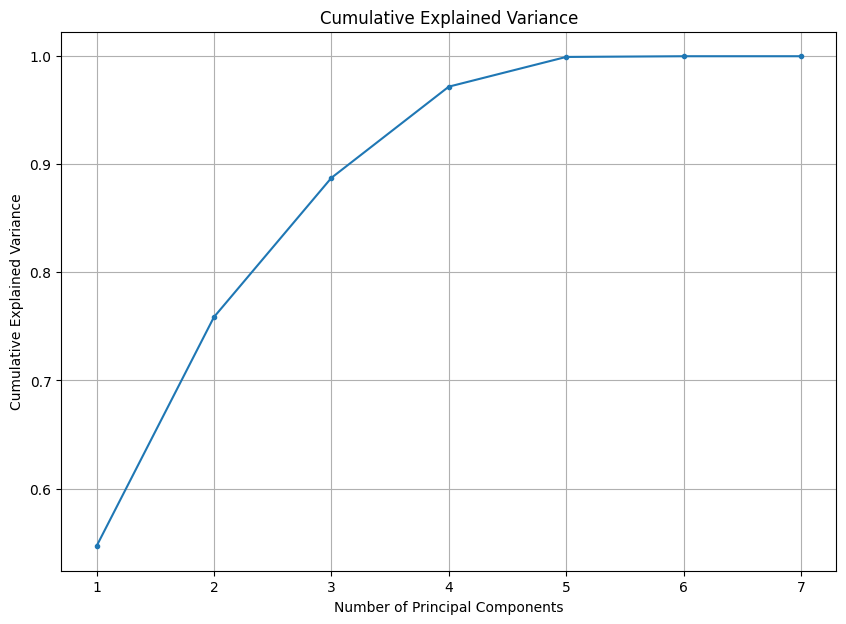

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Create a plot of the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='.')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

First 3 components can explain almost 90% of the variance.


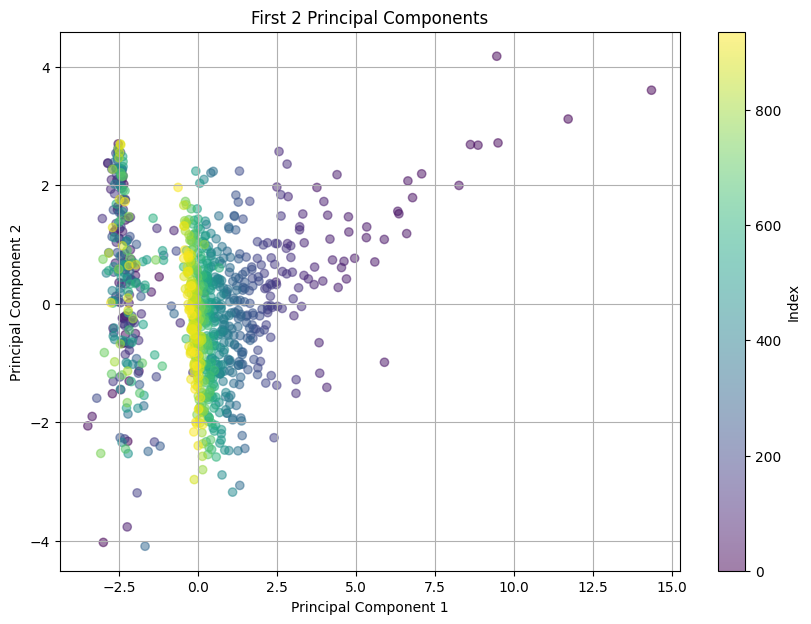

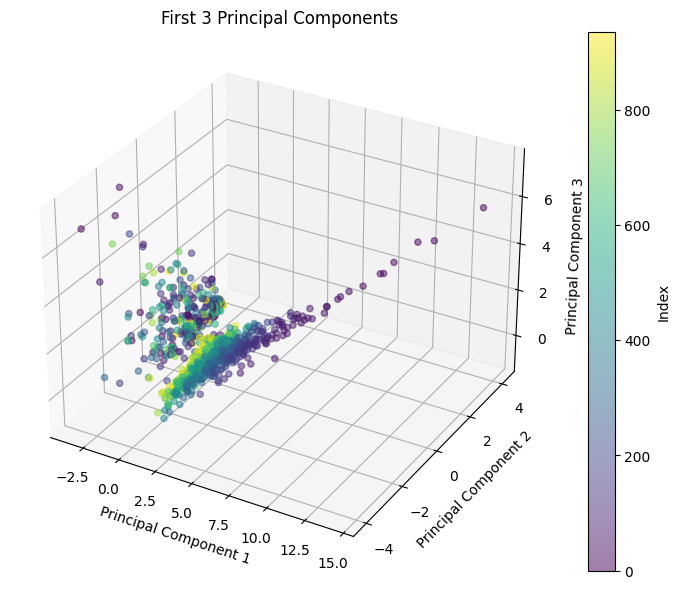

In [47]:
df_pc = pd.DataFrame(data = principal_components[:, :3], columns = ['PC1', 'PC2', 'PC3'])
# Plot the first 2 principal components with different colors
plt.figure(figsize=(10,7))
scatter = plt.scatter(df_pc['PC1'], df_pc['PC2'], alpha=0.5, c=df_pc.index, cmap='viridis')
plt.title('First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(scatter, label='Index')
plt.show()

# Plot the first 3 principal components with different colors
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pc['PC1'], df_pc['PC2'], df_pc['PC3'], alpha=0.5, c=df_pc.index, cmap='viridis')
ax.set_title('First 3 Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, ax=ax, label='Index')
plt.show()

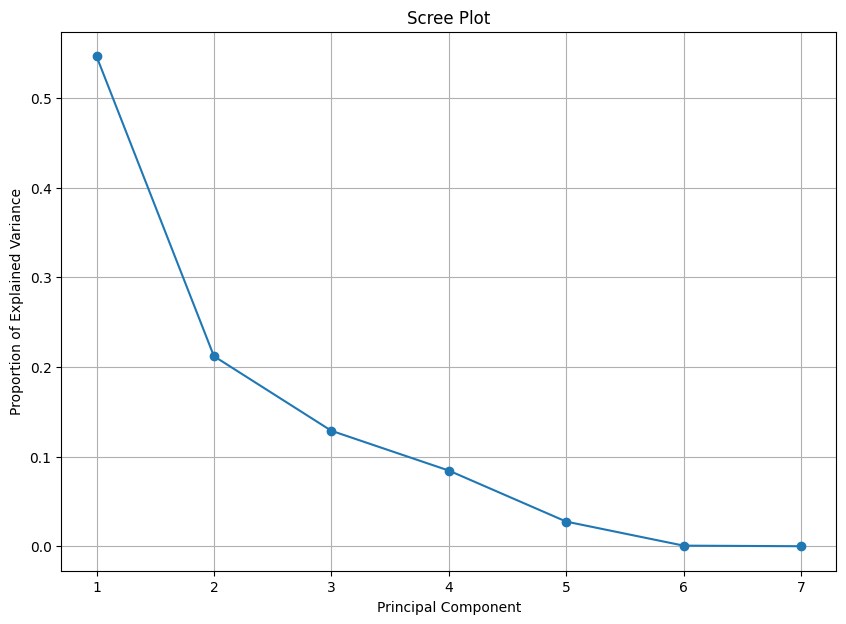

In [48]:
# Scree plot
plt.figure(figsize=(10,7))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

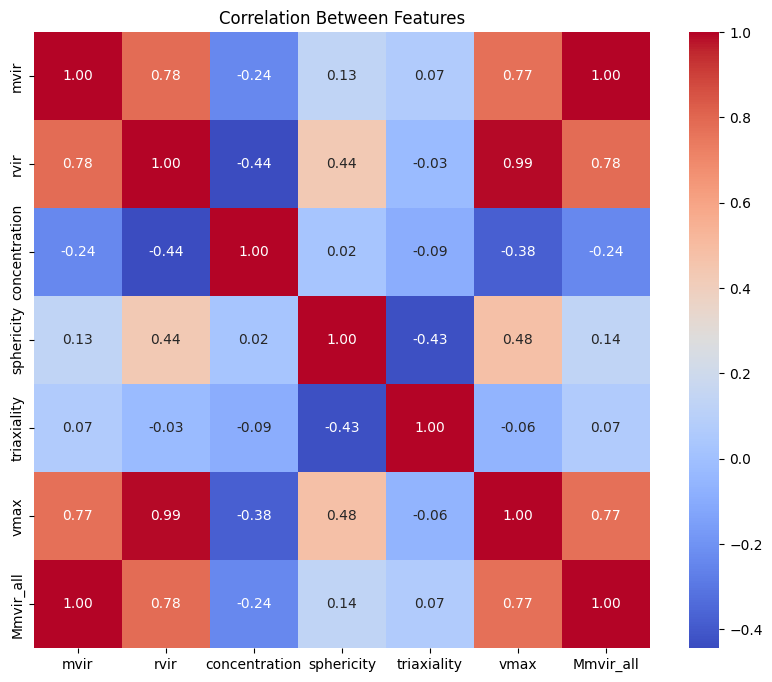

In [52]:
import seaborn as sns
corr_matrix_selected = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_selected, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Between Features")
plt.show()